Anggota Kelompok:
- Melvan Safero Lee (10121063)
- Hanny Margaretha Aritonang (10121008)

# Model MLP

In [ ]:
#Umum
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Tugas 4 DL
card = pd.read_csv("cardio_train.csv", delimiter=';')
card

/content/drive/MyDrive/Colab Notebooks/Tugas 4 DL


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
card.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Creating new Variables

card['bmi'] = (card['weight'] / (((card['height']/100)**2))).round(decimals=2)   # Body mass index
card['age_y'] = (card['age']/365).round(decimals=2)                               # Age in years

# Creating Flags for categories as 0-1

card['bmi_high'] = (card['bmi'] >= 30).astype(int)

del card['age']
del card['id']

In [ ]:
card.head(10)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_y,bmi_high
0,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0
1,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,1
2,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0
3,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,0
4,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0
5,1,151,67.0,120,80,2,2,0,0,0,0,29.38,60.04,0
6,1,157,93.0,130,80,3,1,0,0,1,0,37.73,60.58,1
7,2,178,95.0,130,90,3,3,0,0,1,1,29.98,61.87,0
8,1,158,71.0,110,70,1,1,0,0,1,0,28.44,48.41,0
9,1,164,68.0,110,60,1,1,0,0,0,0,25.28,54.34,0


<ipython-input-13-6d8dece50562>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=card,ci=None,ax=ax)
<ipython-input-13-6d8dece50562>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=card,ci=None,ax=ax)
<ipython-input-13-6d8dece50562>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=card,ci=None,ax=ax)
<ipython-input-13-6d8dece50562>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=card,ci=None,ax=ax)
<ipython-input-13-6d8dece50562>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=card,ci=None,ax=ax)
<ipython-input-13-6d8dece50562>:10: FutureWarning: 

The `ci` parameter is deprecated

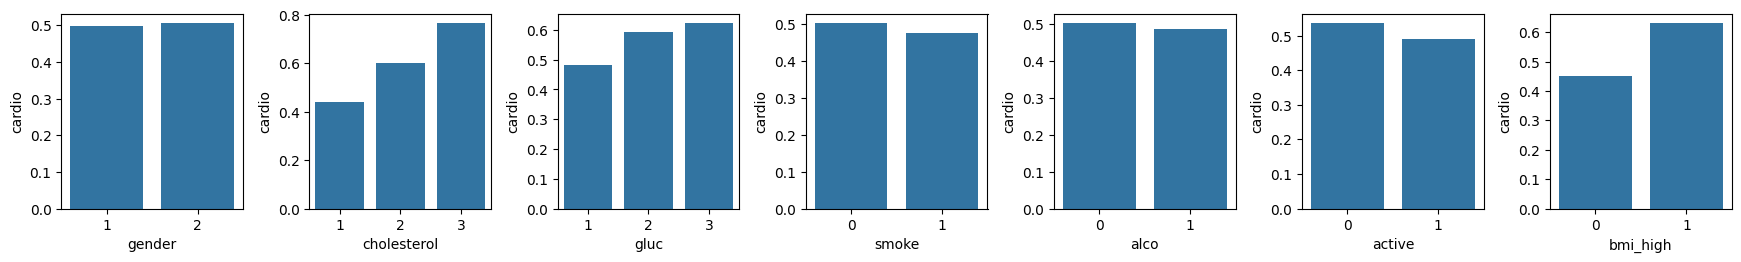

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [ ]:
# Visualizing Discrete variables and its effects on cardio

Colunas = ('gender', 'cholesterol', 'gluc', 'smoke',    'alco', 'active',   'bmi_high')
fig=plt.figure(figsize=(20,20))
j = 1
for i in Colunas :
  ax=fig.add_subplot(8,8,j)
  j = j + 1
  plt.figure(figsize=(2, 2))
  sns.barplot(x=i,y='cardio',data=card,ci=None,ax=ax)
  fig.tight_layout()
plt.show()

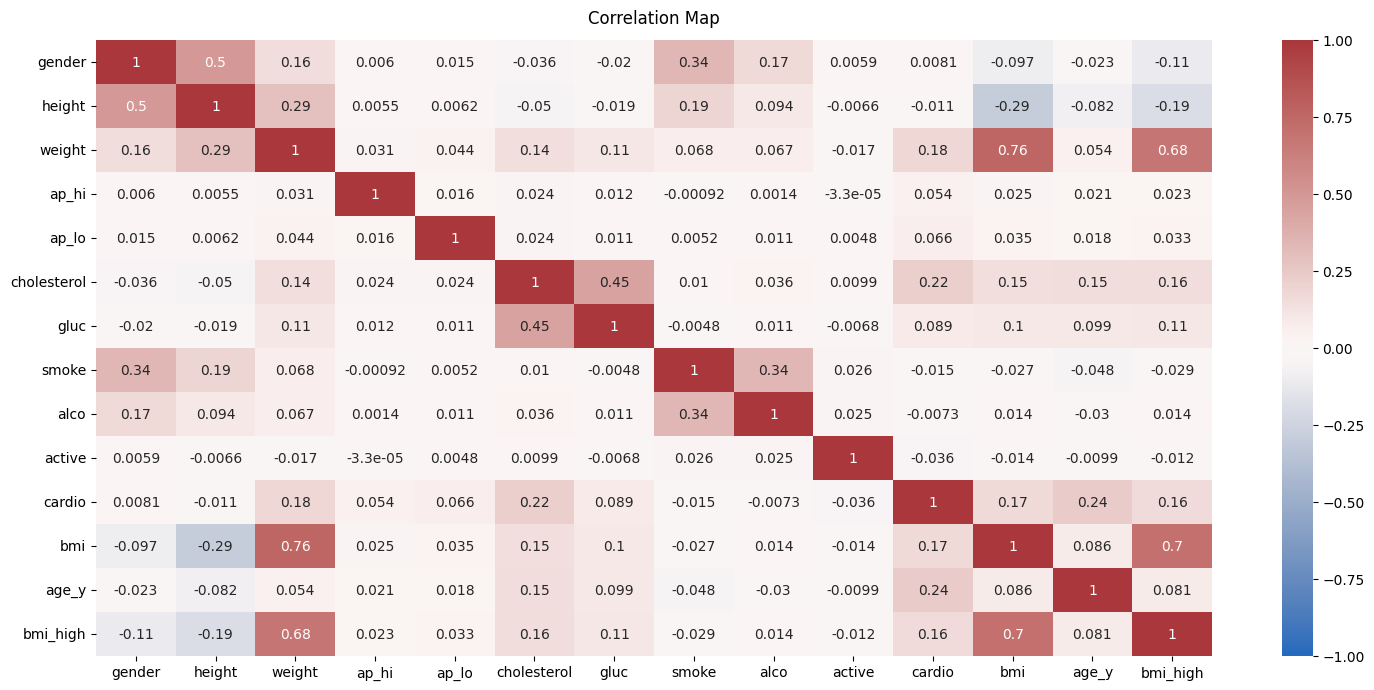

In [ ]:
# Correlation matrix to understand relation between variables

plt.figure(figsize=(18, 8))
sns.heatmap(card.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

<Axes: xlabel='age_y', ylabel='weight'>

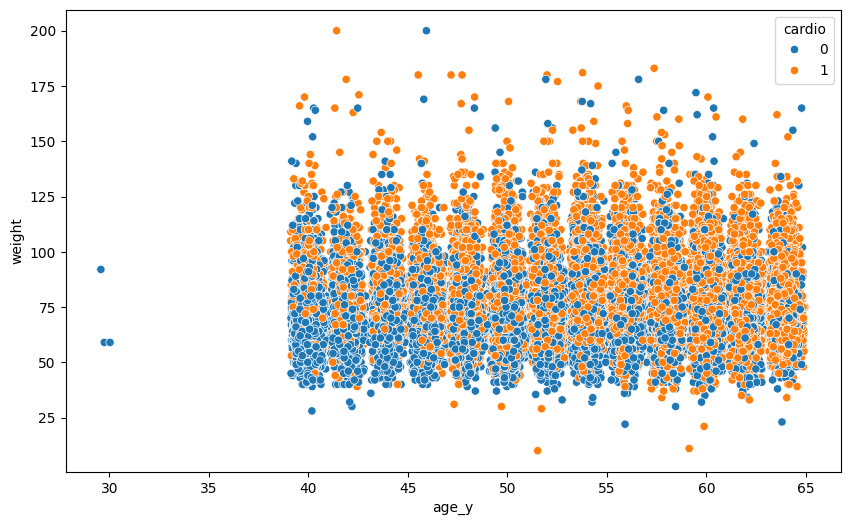

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_y', y='weight', data= card, hue='cardio')

<Axes: xlabel='weight', ylabel='Count'>

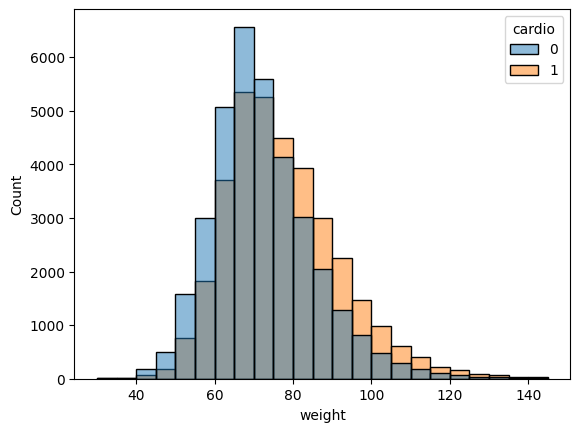

In [ ]:
# Visualizing and understanding continuous variables relation with cardio variable

sns.histplot(card, x='weight', bins = range(30,150,5), hue='cardio')

<Axes: xlabel='age_y', ylabel='Count'>

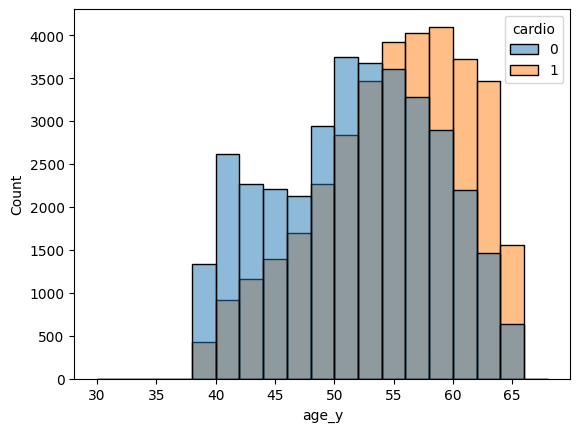

In [ ]:
sns.histplot(card, x='age_y', bins = range(30,70,2), hue='cardio')

In [ ]:
cardX = card.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13]]        # independent variable

cardY = card.iloc[:,10]                                    # dependent variable

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(cardX, cardY,random_state=1, test_size=0.25)

In [ ]:
# Multi MLP Generator
training_accuracy = []
testing_accuracy = []
Layer1 = range(10,90,10)
Layer2 = range(10,90,10)
LayersComb = len(Layer1)*len(Layer2)
Step=0
score=0

for i in Layer1 :
  for j in Layer2 :
    mlp = MLPClassifier(hidden_layer_sizes=(i,j),activation="relu" ,random_state=1, max_iter=500, tol=0.001, n_iter_no_change=3, verbose=True)
    mlp.fit(X_train, Y_train)
    Y_pred_train = mlp.predict(X_train)
    training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
    Y_pred_test = mlp.predict(X_test)
    acc_score = accuracy_score(Y_test,Y_pred_test)
    testing_accuracy.append(acc_score)
    Step = Step + 1
    if score < acc_score:
        score = acc_score
        best_Layer1 = i
        best_Layer2 = j
        best_Step = Step

    print('Step ', Step, ' of ', LayersComb, ' Layer1: ', i, ' Layer2: ', j)
    print('Best Accuracy Score', score.round(4), ' Best Layer1: ', best_Layer1, ' Best Layer2: ', best_Layer2, ' do Step:', best_Step)

Iteration 1, loss = 4.47747450
Iteration 2, loss = 0.68931159
Iteration 3, loss = 0.62008053
Iteration 4, loss = 0.61160036
Iteration 5, loss = 0.60217781
Iteration 6, loss = 0.60083645
Iteration 7, loss = 0.59348886
Iteration 8, loss = 0.58847071
Iteration 9, loss = 0.59222796
Iteration 10, loss = 0.59181630
Iteration 11, loss = 0.59083978
Iteration 12, loss = 0.58515946
Iteration 13, loss = 0.58505170
Iteration 14, loss = 0.58581167
Iteration 15, loss = 0.58312183
Iteration 16, loss = 0.58092973
Iteration 17, loss = 0.58261685
Iteration 18, loss = 0.58139638
Iteration 19, loss = 0.58122946
Iteration 20, loss = 0.57806226
Iteration 21, loss = 0.58098875
Iteration 22, loss = 0.57978671
Iteration 23, loss = 0.58228006
Iteration 24, loss = 0.58361829
Training loss did not improve more than tol=0.001000 for 3 consecutive epochs. Stopping.
Step  1  of  64  Layer1:  10  Layer2:  10
Best Accuracy Score 0.7289  Best Layer1:  10  Best Layer2:  10  do Step: 1
Iteration 1, loss = 2.80543459
Iter

In [ ]:
mlp_selected = MLPClassifier(hidden_layer_sizes=(40,60),random_state=1, max_iter=500, tol=0.001, n_iter_no_change=3, verbose=True)
mlp_selected.fit(X_train, Y_train)

Iteration 1, loss = 0.75811578
Iteration 2, loss = 0.60588000
Iteration 3, loss = 0.60027219
Iteration 4, loss = 0.59123987
Iteration 5, loss = 0.59290213
Iteration 6, loss = 0.57961779
Iteration 7, loss = 0.58324391
Iteration 8, loss = 0.58550735
Iteration 9, loss = 0.58180726
Iteration 10, loss = 0.57761915
Iteration 11, loss = 0.57284440
Iteration 12, loss = 0.57634156
Iteration 13, loss = 0.57204193
Iteration 14, loss = 0.56440429
Iteration 15, loss = 0.57490213
Iteration 16, loss = 0.57324702
Iteration 17, loss = 0.56236683
Iteration 18, loss = 0.56655360
Iteration 19, loss = 0.56451521
Iteration 20, loss = 0.56471864
Iteration 21, loss = 0.56123719
Iteration 22, loss = 0.56526873
Iteration 23, loss = 0.56487952
Iteration 24, loss = 0.55931481
Iteration 25, loss = 0.56316947
Iteration 26, loss = 0.55896386
Iteration 27, loss = 0.56455147
Iteration 28, loss = 0.56462882
Training loss did not improve more than tol=0.001000 for 3 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(40, 60), max_iter=500, n_iter_no_change=3,
              random_state=1, tol=0.001, verbose=True)

In [ ]:
Y_pred_train = mlp_selected.predict(X_train)
training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
Y_pred_test = mlp_selected.predict(X_test)
acc_score = accuracy_score(Y_test,Y_pred_test)
testing_accuracy.append(acc_score)

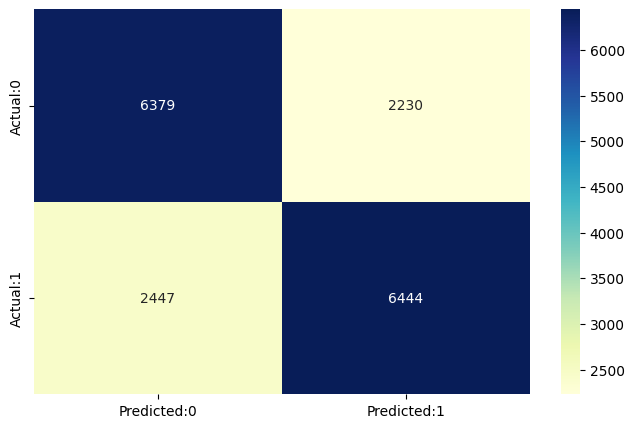

In [ ]:
cm=confusion_matrix(Y_test,Y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      8609
           1       0.74      0.72      0.73      8891

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



# Model CNN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Load the data
data = pd.read_csv("cardio_train.csv", delimiter=';')
data = data.drop(columns=['id'])  # Drop the 'id' column if it's not necessary

# Creating new Variables
data['bmi'] = (data['weight'] / (((data['height'] / 100) ** 2))).round(decimals=2)  # Body mass index
data['age_y'] = (data['age'] / 365).round(decimals=2)  # Age in years

# Creating Flags for categories as 0-1
data['bmi_high'] = (data['bmi'] >= 30).astype(int)
del data['age']

# Normalize the data
data_normalized = (data - data.min()) / (data.max() - data.min())

# Separate features and labels
X = data_normalized.drop(columns=['cardio']).values
y = data['cardio'].values

# Convert labels to categorical (one hot encoding)
y = to_categorical(y, num_classes=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the dimensions of the image (e.g., 4x4 for 16 features)
img_dim = int(np.ceil(np.sqrt(X.shape[1])))

def create_image(data_row):
    data_reshaped = np.pad(data_row, (0, img_dim**2 - len(data_row)), 'constant')
    image = data_reshaped.reshape((img_dim, img_dim))
    return image

X_train_images = np.array([create_image(row) for row in X_train])
X_test_images = np.array([create_image(row) for row in X_test])

# Reshape for CNN input
X_train_images = X_train_images[..., np.newaxis]
X_test_images = X_test_images[..., np.newaxis]

# Define the model
model = Sequential()
model.add(Conv2D(filters=13, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(img_dim, img_dim, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


# Compile the model
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    validation_split=0.2
)

# Fit the model
batch_size = 32
epochs = 10

train_generator = datagen.flow(X_train_images, y_train, batch_size=batch_size, subset='training')
validation_generator = datagen.flow(X_train_images, y_train, batch_size=batch_size, subset='validation')

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Menyimpan model
model.save('heart_disease_classifier.h5')

Epoch 1/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.6930 - accuracy: 0.5058 - val_loss: 0.6929 - val_accuracy: 0.5199
Epoch 2/10
1313/1313 [==============================] - 22s 16ms/step - loss: 0.6929 - accuracy: 0.5174 - val_loss: 0.6928 - val_accuracy: 0.5135
Epoch 3/10
 299/1313 [=====>........................] - ETA: 10s - loss: 0.6929 - accuracy: 0.5163

In [ ]:
# Evaluate the model
score = model.evaluate(X_test_images, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Predict the values from the test set
y_pred = model.predict(X_test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

Test loss: 0.6929041743278503
Test accuracy: 0.5576571226119995
547/547 [==============================] - 1s 2ms/step


Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.78      0.64      8688
           1       0.61      0.34      0.43      8812

    accuracy                           0.56     17500
   macro avg       0.57      0.56      0.54     17500
weighted avg       0.57      0.56      0.53     17500



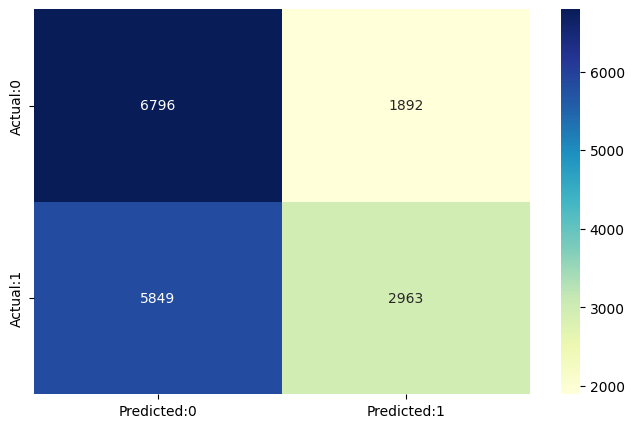

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
conf_matrix=pd.DataFrame(data=conf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

# Classification Report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(class_report)


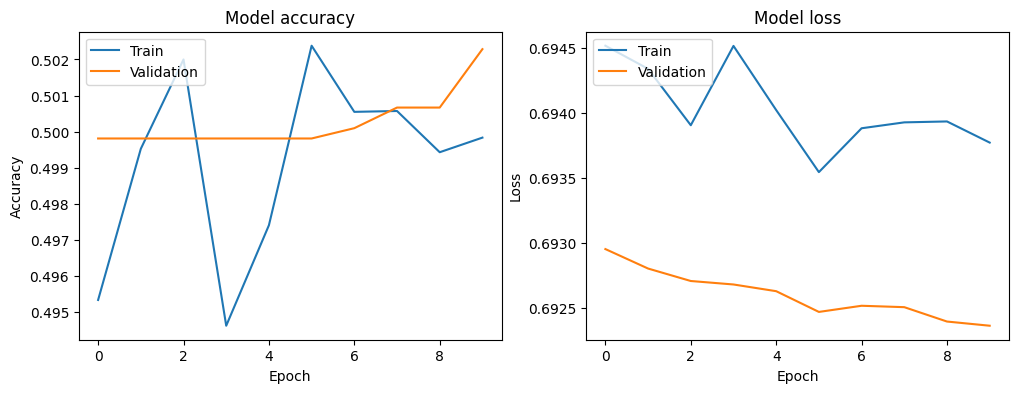

In [ ]:

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()